# MMIK lab 3
## Paweł Kopel

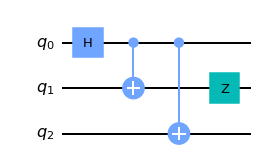

In [19]:
import numpy as np
from qiskit import QuantumCircuit

qnumber=3
circ = QuantumCircuit(qnumber)

# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

circ.z(1)


# Create a Quantum Circuit
meas = QuantumCircuit(qnumber, qnumber)
meas.barrier(range(qnumber))
# map the quantum measurement to the classical bits
meas.measure(range(qnumber), range(qnumber))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(qnumber), front=True)

#drawing the circuit
# qc.draw('mpl')
circ.draw('mpl')

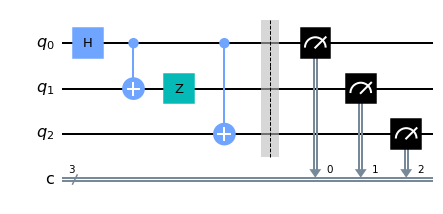

In [6]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile 

# Use Aer's qasm_simulator
from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(qc, backend, optimization_level=3)


qc_compiled.draw('mpl')

In [14]:
from qiskit.quantum_info import Statevector

# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**qnumber)


# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

{'111': 481, '000': 543}


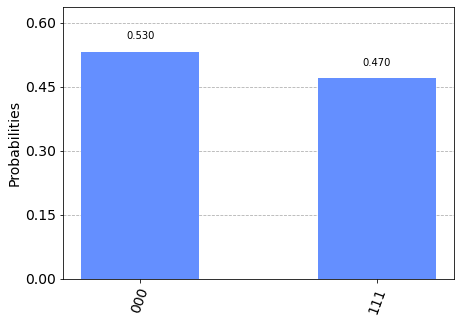

In [15]:
from qiskit.visualization import plot_histogram

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)

plot_histogram(counts)

ibmqfactory.load_account:WARNING:2022-03-22 15:39:14,097: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_santiago


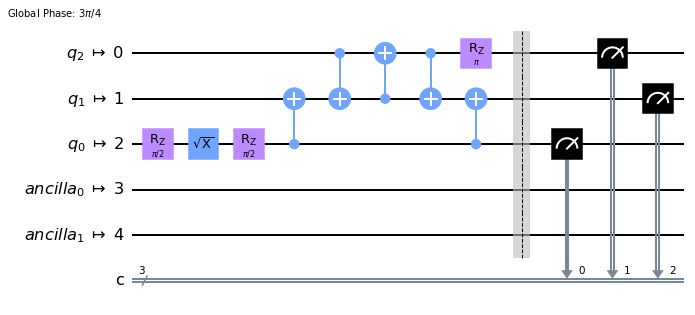

In [28]:
from qiskit import IBMQ 
from qiskit.providers.ibmq import least_busy

IBMQ.load_account() 
provider = IBMQ.get_provider(hub='ibm-q')
n=2
# wybieramy najmniej zajęte urządzenie o liczbie qbitów większej od n, działające i 
#nie będące symulatorem
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > n and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)


qc_compiled = transpile(qc, backend, optimization_level=1)

qc_compiled.draw('mpl')

In [29]:
# Execute the circuit on the real device simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.


from qiskit.tools.monitor import job_monitor

job_monitor(job, interval = 1)

result = job.result()

answer=result.get_counts()


Job Status: job has successfully run


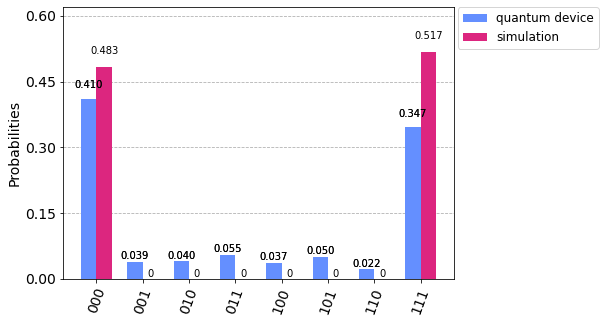

In [30]:
#plot everything
plot_histogram(data=[answer, counts], legend=['quantum device', 'simulation'])

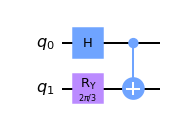

In [34]:
from math import pi

comp_q_number = 2

comp_c = QuantumCircuit(comp_q_number)

comp_c.h(0)

theta = 2 * pi / 3
comp_c.ry(theta, 1)


comp_c.cx(0, 1)

comp_c.draw('mpl')

In [35]:
from qiskit.quantum_info import Statevector

# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**comp_q_number)


# Evolve the state by the quantum circuit
state = state.evolve(comp_c)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [36]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

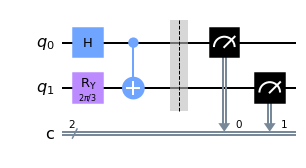

In [18]:

meas = QuantumCircuit(comp_q_number, comp_q_number)
meas.barrier(range(comp_q_number))
# map the quantum measurement to the classical bits
meas.measure(range(comp_q_number), range(comp_q_number))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
comp_qc = meas.compose(comp_c, range(comp_q_number), front=True)

#drawing the circuit
comp_qc.draw('mpl')

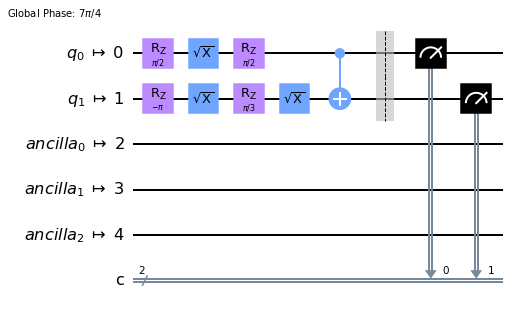

In [19]:
# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
comp_qc_compiled = transpile(comp_qc, backend, optimization_level=3)


comp_qc_compiled.draw('mpl')

{'00': 129, '01': 344, '10': 372, '11': 179}


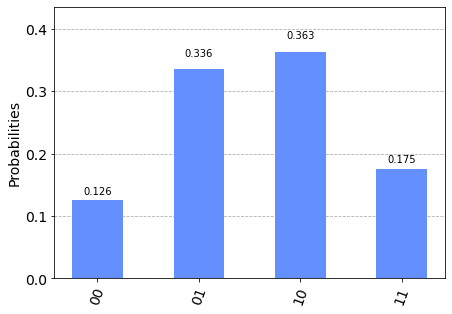

In [20]:
# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(comp_qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(comp_qc_compiled)
print(counts)

plot_histogram(counts)

least busy backend:  ibmq_santiago


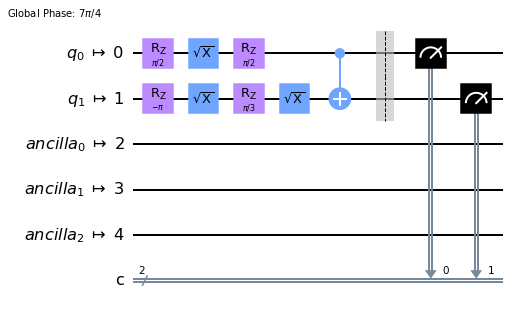

In [21]:

n=1
# wybieramy najmniej zajęte urządzenie o liczbie qbitów większej od n, działające i 
#nie będące symulatorem
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > n and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)


comp_qc_compiled = transpile(comp_qc, backend, optimization_level=1)

comp_qc_compiled.draw('mpl')

In [22]:

job = backend.run(comp_qc_compiled, shots=1024)

# Grab the results from the job.


from qiskit.tools.monitor import job_monitor

job_monitor(job, interval = 1)

result = job.result()

answer=result.get_counts()

Job Status: job has successfully run


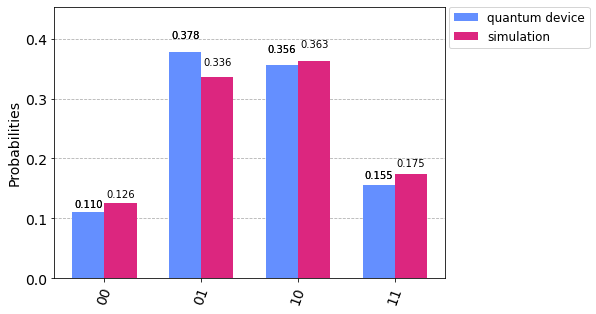

In [23]:
#plot everything
plot_histogram(data=[answer, counts], legend=['quantum device', 'simulation'])